In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay
import statsmodels.api as sm

In [2]:
# read data
df = pd.read_excel('/Users/Owner/Desktop/AI-Human-PewData.xlsx')

In [3]:
# show first five rows
df.head()

,Unnamed: 0,QKEY,INTERVIEW_START_W99,INTERVIEW_END_W99,DEVICE_TYPE_W99,LANG_W99,FORM_W99,XTABLET_W99,TECH1_W99,SC1_W99,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_INC_SDT1,F_REG,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W99
0,0,100260,2021-11-03 14:25:27,2021-11-03 14:45:34,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$50,000 to less than $60,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Several times a day,No,Middle income,0.206396
1,1,100314,2021-11-04 12:35:35,2021-11-04 12:55:29,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Rep/Lean Rep,Moderate/Liberal Rep/Lean,"$40,000 to less than $50,000",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Several times a day,Yes,Middle income,0.315090
2,2,100363,2021-11-03 20:23:43,2021-11-03 20:36:24,Smartphone,English,Form 1,Non-tablet HH,Mostly positive,NaN,...,NaN,Dem/Lean Dem,Moderate/Conservative Dem/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Several times a day,No,Upper income,0.829579
3,3,100598,2021-11-02 13:01:05,2021-11-04 12:37:42,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Mostly positive,...,NaN,Rep/Lean Rep,Conservative Rep/Lean,"$100,000 or more",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Several times a day,Yes,Upper income,0.337527
4,4,100637,2021-11-02 12:32:58,2021-11-02 12:46:23,Laptop/PC,English,Form 2,Non-tablet HH,NaN,Equal positive and negative effects,...,The Republican Party,Rep/Lean Rep,Conservative Rep/Lean,"$30,000 to less than $40,000",You are ABSOLUTELY CERTAIN that you are regist...,Very conservative,Less often,No,Lower income,1.210606


In [4]:
# calculate the total number 
len(df)

10260

In [5]:
# add predictors and response variable to X and y
c_df = df.iloc[0:10260]

predictors = ['F_METRO', 'F_CREGION', 'F_AGECAT','F_GENDER','F_EDUCCAT','F_EDUCCAT2','F_RELIG','F_PARTY_FINAL','F_INC_SDT1']
outcome = 'SMALG2_W99'

In [6]:
# add predictors and response variable to X and y
X = c_df[predictors]
y = c_df[outcome]
clean_df = c_df[predictors + [outcome]]
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
0,Metropolitan,West,65+,A man,College graduate+,College graduate/some post grad,Nothing in particular,Republican,"$50,000 to less than $60,000",NaN
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
3,Metropolitan,West,50-64,A woman,College graduate+,Postgraduate,Protestant,Republican,"$100,000 or more",NaN
4,Metropolitan,South,65+,A woman,Some College,Associate's degree,Protestant,Independent,"$30,000 to less than $40,000",NaN


In [7]:
# Replace "refused" responses with NaN
# Assuming "refused" is represented as the string "Refused"
clean_df.replace("Refused", pd.NA, inplace=True)

clean_df = clean_df.dropna()

/var/folders/j6/k6gy0m_x02b05c849w1998_c0000gn/T/ipykernel_9122/604183416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.replace("Refused", pd.NA, inplace=True)


In [8]:
# show first five rows of cleaned data
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society


In [9]:
# merge relative coloums
clean_df["F_EDU"] = clean_df['F_EDUCCAT'] + ' : ' + clean_df['F_EDUCCAT2']
clean_df['F_LOCAL'] = clean_df['F_METRO'] + ' : ' + clean_df['F_CREGION']

In [10]:
# show first five rows of cleaned data
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99,F_EDU,F_LOCAL
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Non-metropolitan : Midwest
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society,College graduate+ : Postgraduate,Metropolitan : Northeast
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society,College graduate+ : College graduate/some post...,Non-metropolitan : Midwest
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Metropolitan : South
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society,"Some College : Some college, no degree",Metropolitan : West


In [11]:
# calculate the number of data in the final version dataset
len(clean_df)

4835

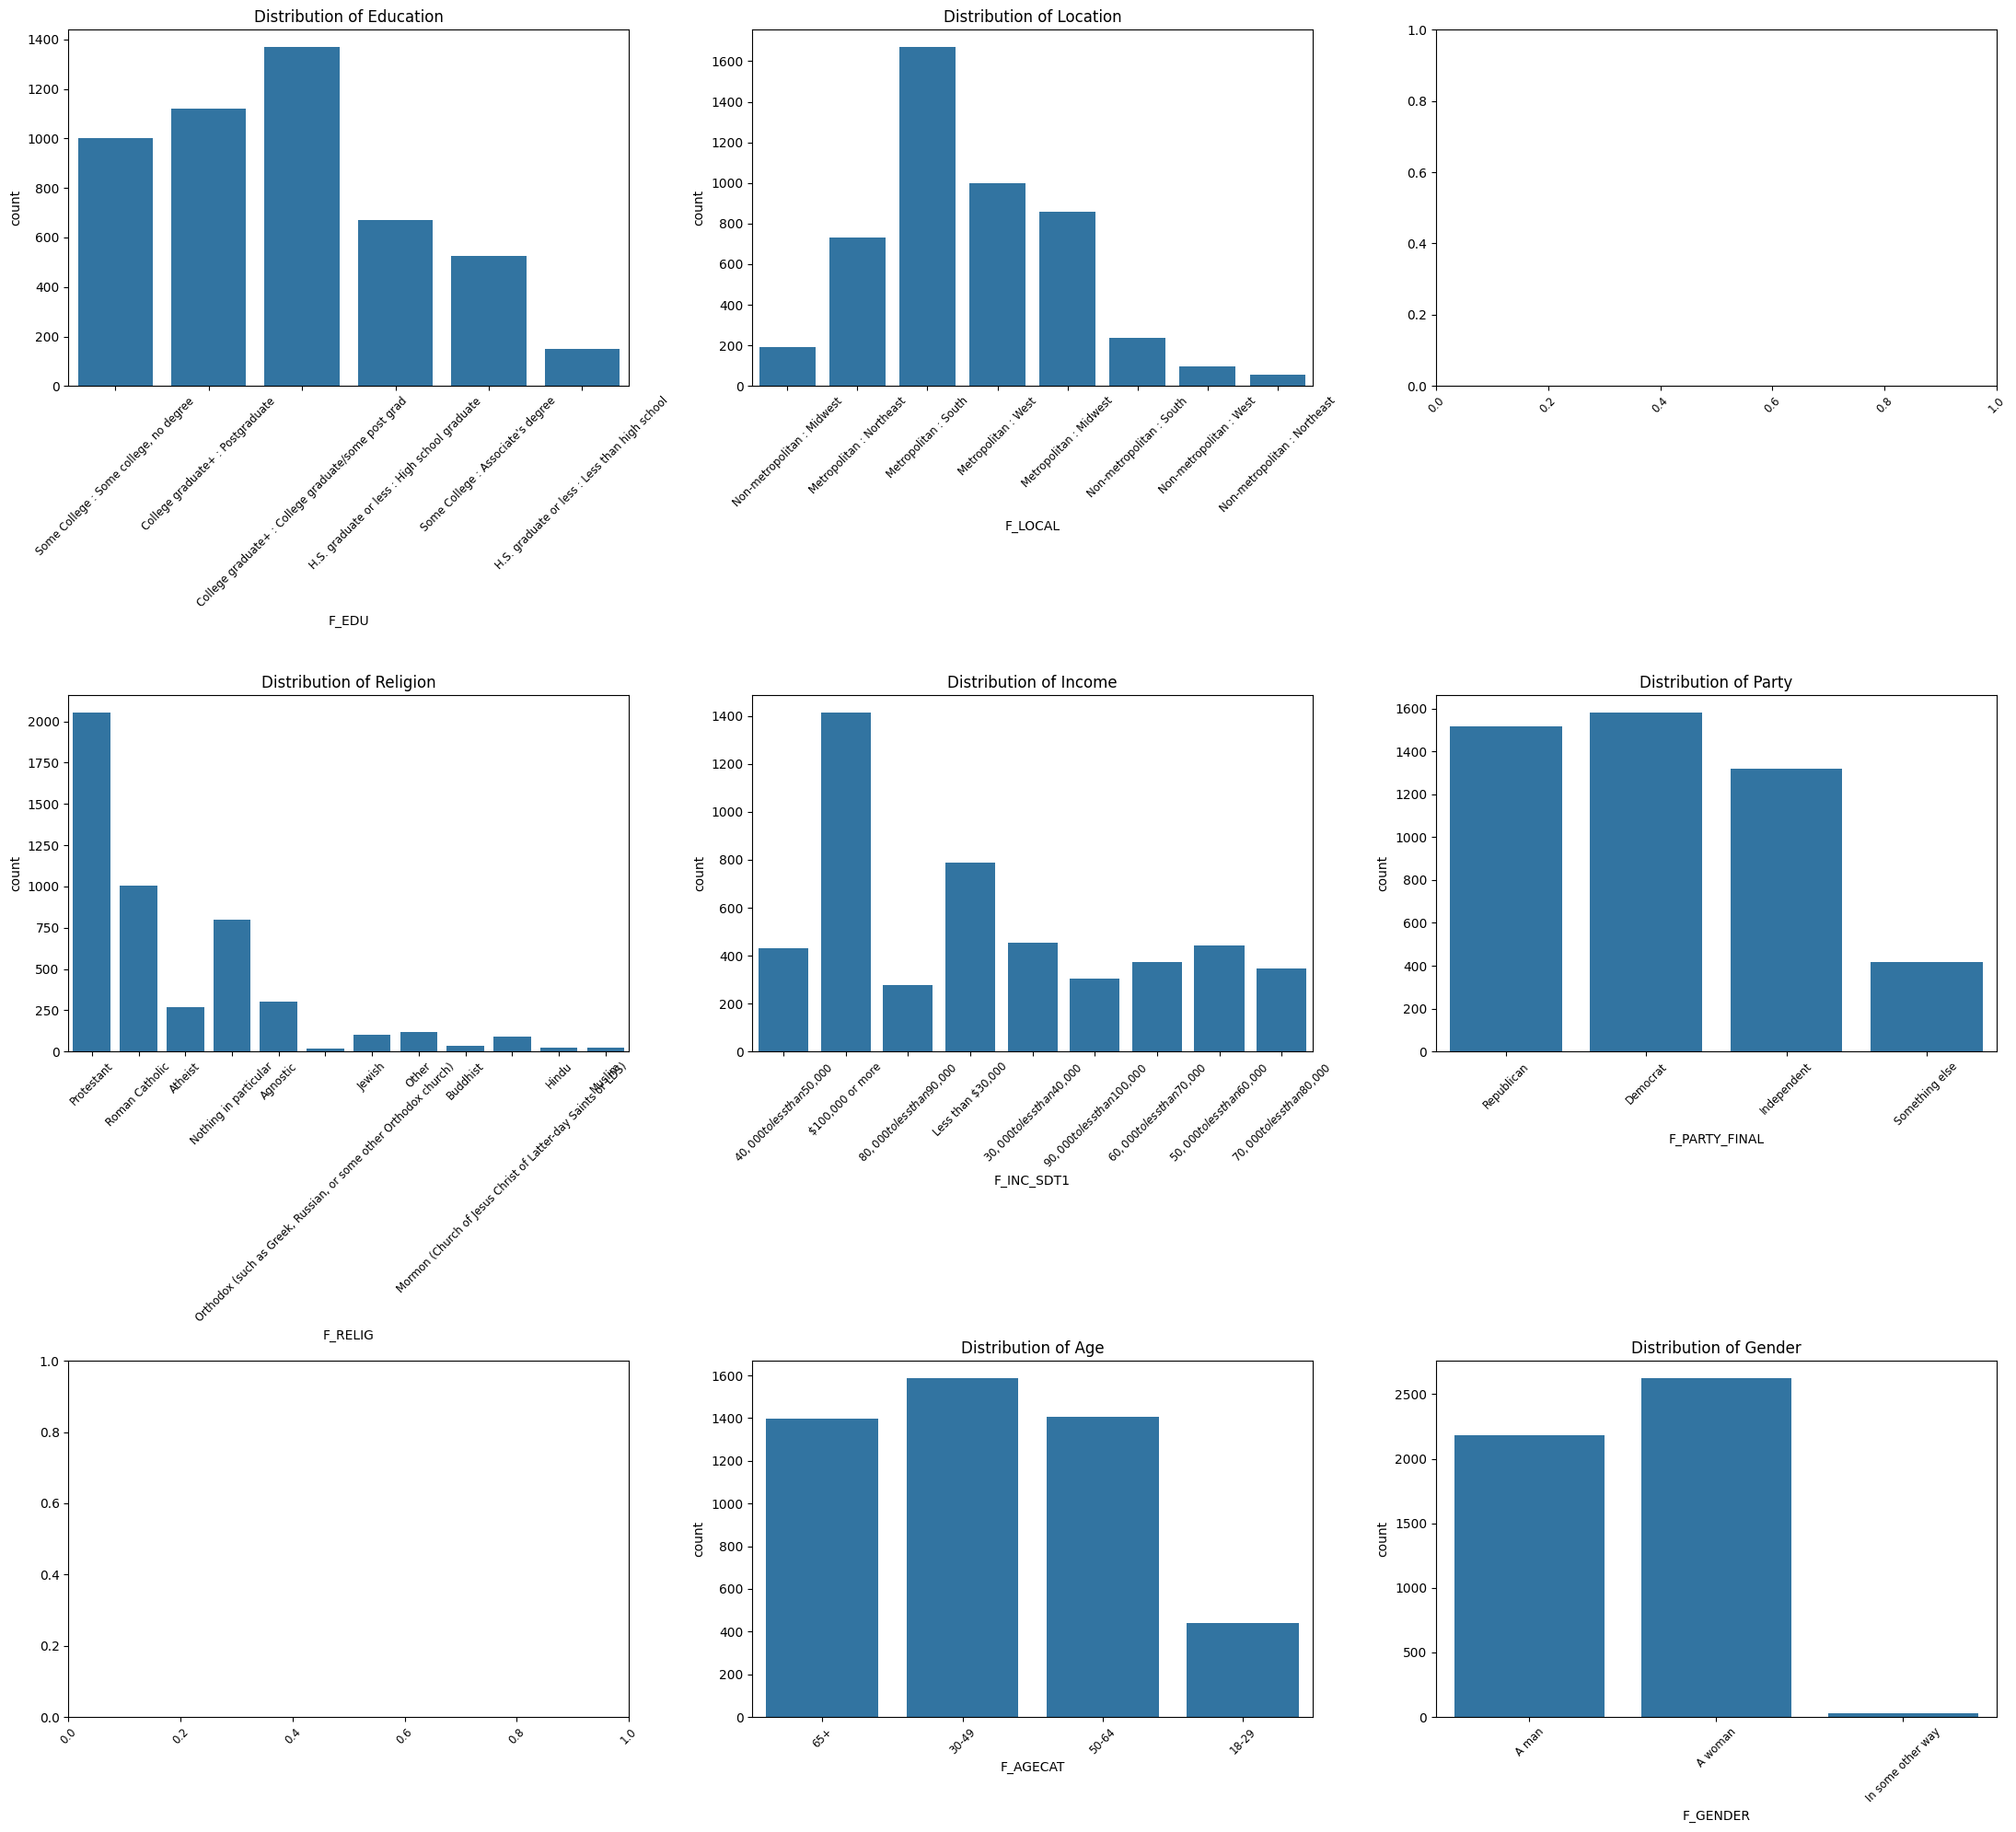

In [12]:
# Bar charts for categorical features
fig, axes = plt.subplots(3, 3, figsize=(22, 20))



sns.countplot(x='F_EDU', data=clean_df, ax=axes[0, 0]).set_title('Distribution of Education')
sns.countplot(x='F_LOCAL', data=clean_df, ax=axes[0, 1]).set_title('Distribution of Location')
sns.countplot(x='F_RELIG', data=clean_df, ax=axes[1, 0]).set_title('Distribution of Religion')
sns.countplot(x='F_INC_SDT1', data=clean_df, ax=axes[1, 1]).set_title('Distribution of Income')
sns.countplot(x='F_PARTY_FINAL', data=clean_df, ax=axes[1, 2]).set_title('Distribution of Party')
sns.countplot(x='F_AGECAT', data=clean_df, ax=axes[2, 1]).set_title('Distribution of Age')
sns.countplot(x='F_GENDER', data=clean_df, ax=axes[2, 2]).set_title('Distribution of Gender')


# Rotate x-axis labels for all subplots
for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=45, labelsize='small')

plt.tight_layout()
plt.show()

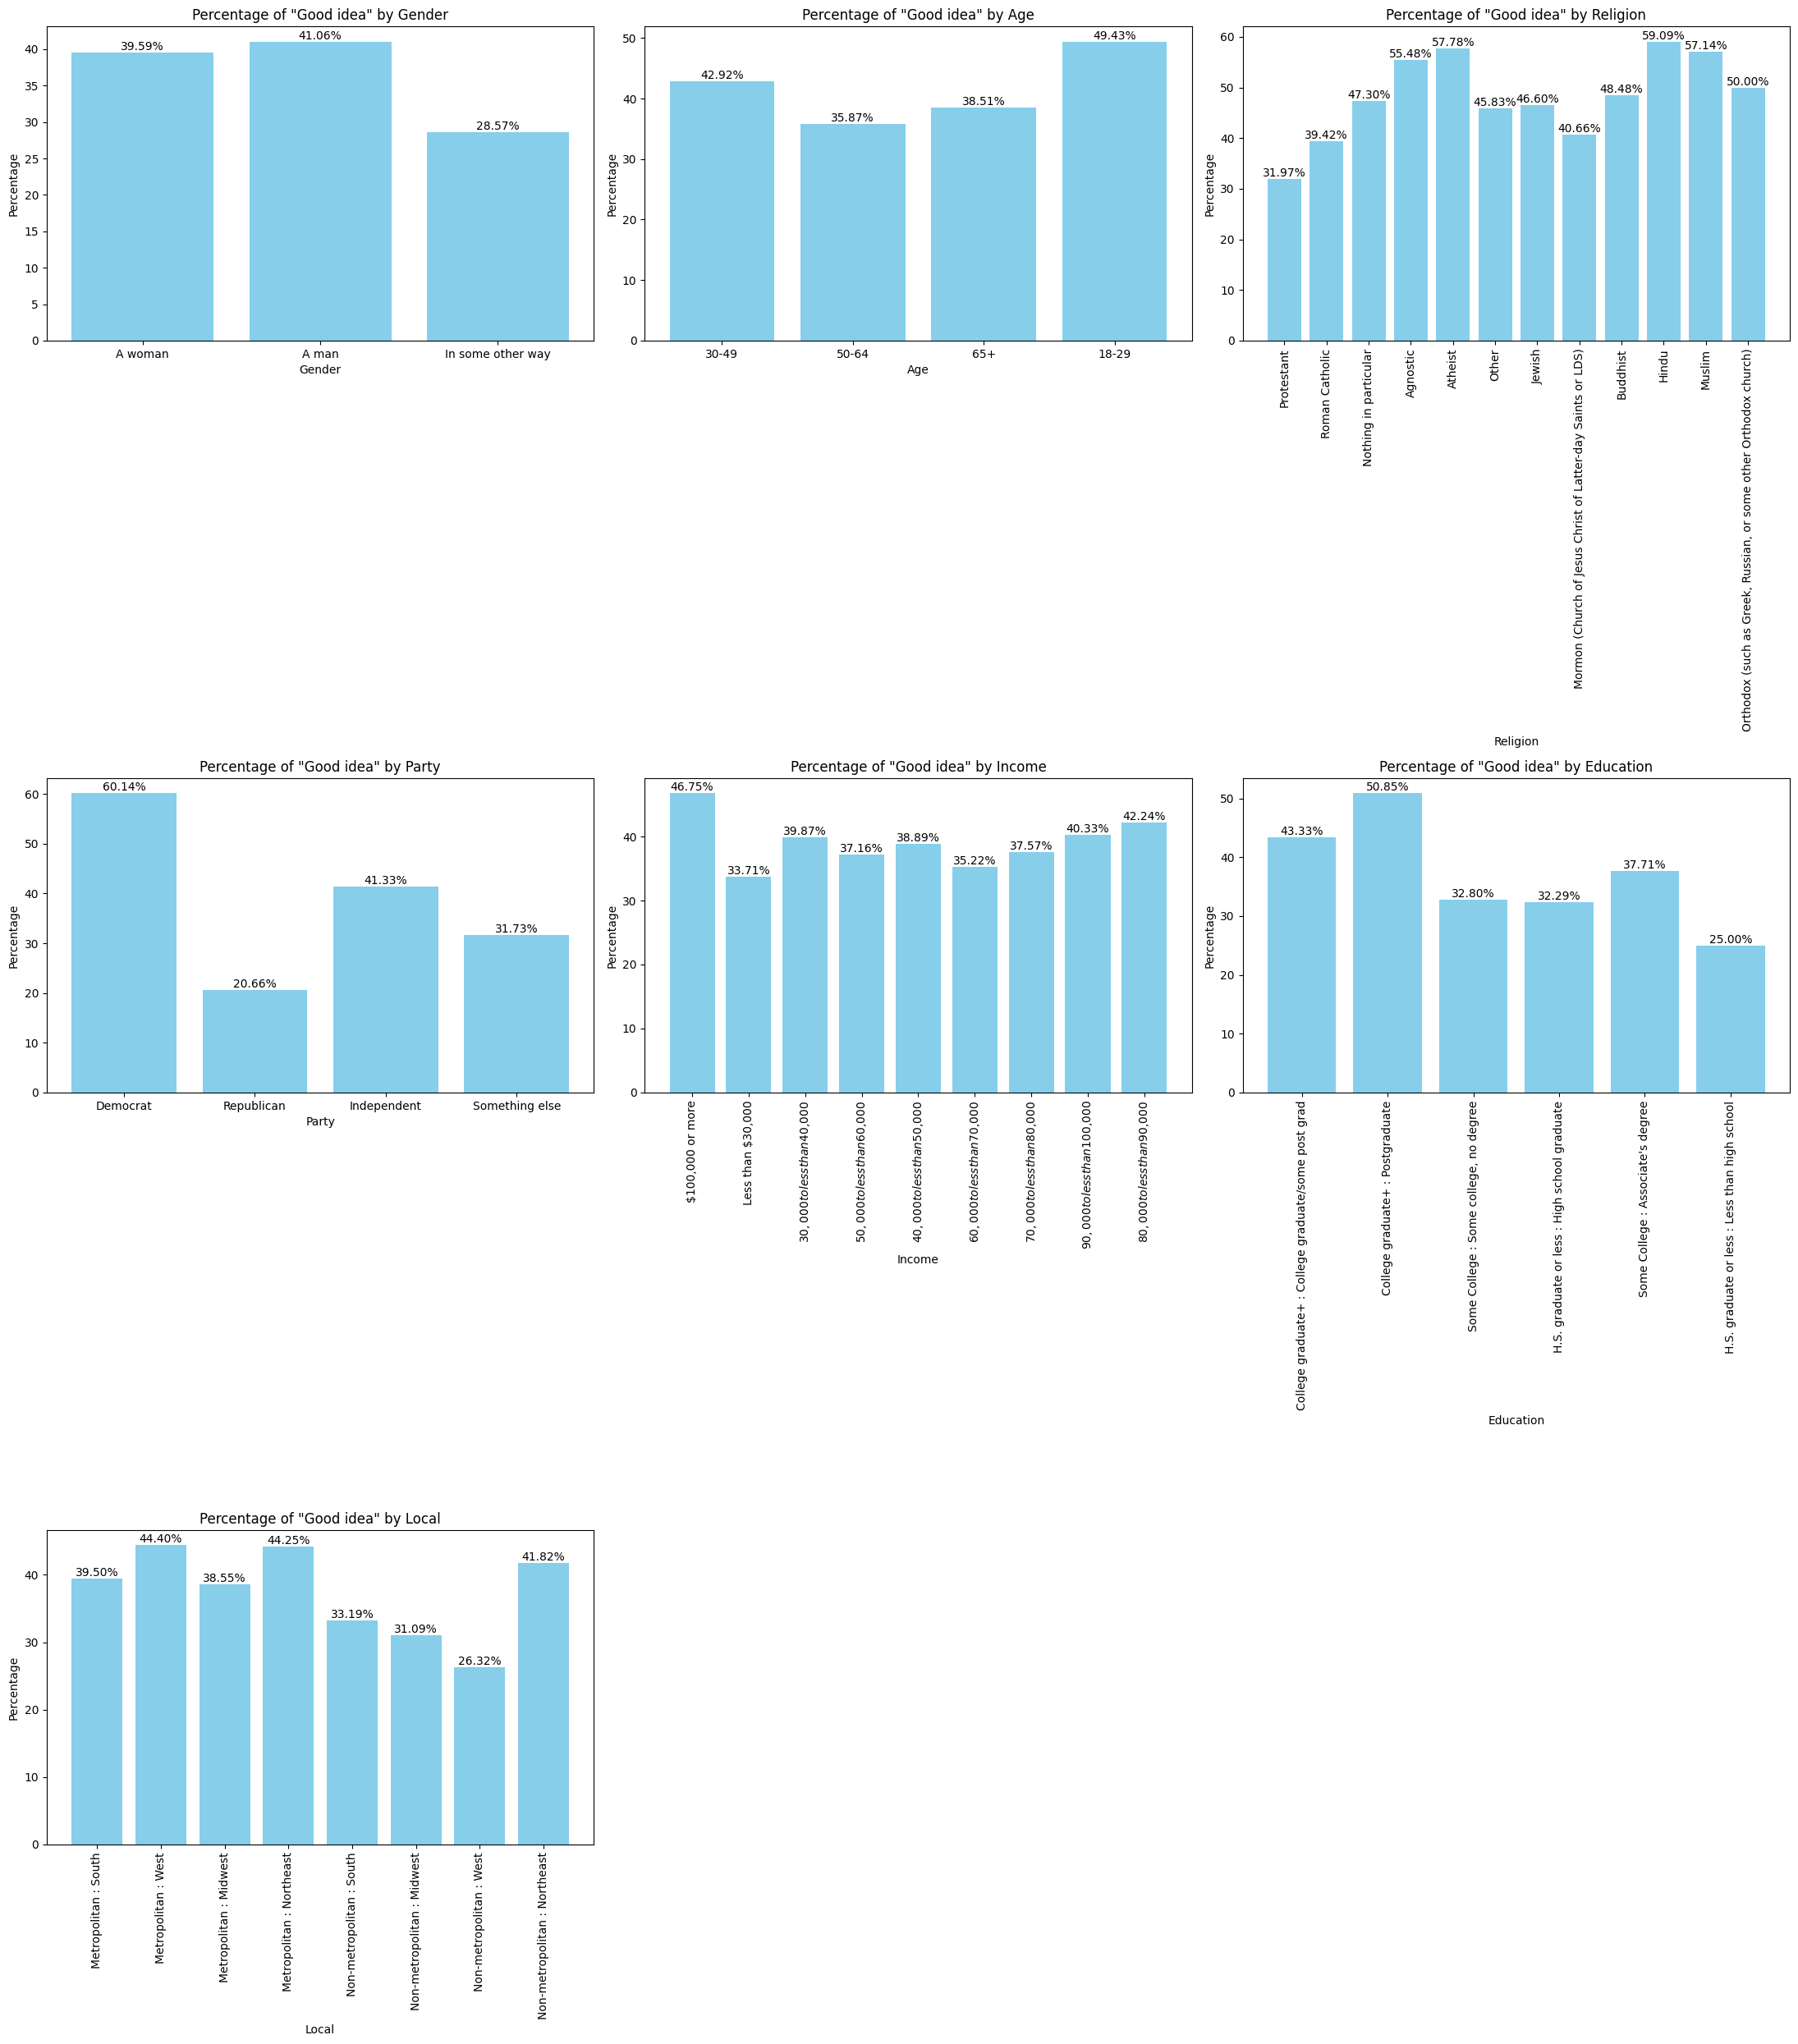

In [13]:
import matplotlib.pyplot as plt

# Filter the Good idea for society data
good_idea_data = clean_df[clean_df['SMALG2_W99'] == 'Good idea for society']

# Create a figure with 9 subgraphs (3x3)
fig, axes = plt.subplots(3, 3, figsize=(22, 25))

# Define drawing function
def plot_good_idea_percentage(ax, category, title, xlabel, rotation=0):
    counts = clean_df[category].value_counts(normalize=True) * 100
    good_idea_percentages = []

    for value in counts.index:
        category_data = good_idea_data[good_idea_data[category] == value]
        good_idea_count = len(category_data)
        total_count = len(clean_df[clean_df[category] == value])
        good_idea_percentage = (good_idea_count / total_count) * 100
        good_idea_percentages.append(good_idea_percentage)

    ax.bar(counts.index, good_idea_percentages, color='skyblue')

    for i in range(len(counts)):
        ax.text(i, good_idea_percentages[i], f'{good_idea_percentages[i]:.2f}%', ha='center', va='bottom')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Percentage')
    ax.set_xticks(range(len(counts)))
    ax.set_xticklabels(counts.index, rotation=rotation, fontsize=10)

# Draw each chart
plot_good_idea_percentage(axes[0, 0], 'F_GENDER', 'Percentage of "Good idea" by Gender', 'Gender')
plot_good_idea_percentage(axes[0, 1], 'F_AGECAT', 'Percentage of "Good idea" by Age', 'Age')
plot_good_idea_percentage(axes[0, 2], 'F_RELIG', 'Percentage of "Good idea" by Religion', 'Religion', rotation=90)
plot_good_idea_percentage(axes[1, 0], 'F_PARTY_FINAL', 'Percentage of "Good idea" by Party', 'Party')
plot_good_idea_percentage(axes[1, 1], 'F_INC_SDT1', 'Percentage of "Good idea" by Income', 'Income', rotation=90)
plot_good_idea_percentage(axes[1, 2], 'F_EDU', 'Percentage of "Good idea" by Education', 'Education', rotation=90)
plot_good_idea_percentage(axes[2, 0], 'F_LOCAL', 'Percentage of "Good idea" by Local', 'Local', rotation=90)

# Hide redundant subgraphs
for ax in [axes[2, 1], axes[2, 2]]:
    ax.axis('off')

# layout adjustment
plt.tight_layout()

# show graph
plt.show()


In [14]:
clean_df.head()

,F_METRO,F_CREGION,F_AGECAT,F_GENDER,F_EDUCCAT,F_EDUCCAT2,F_RELIG,F_PARTY_FINAL,F_INC_SDT1,SMALG2_W99,F_EDU,F_LOCAL
1,Non-metropolitan,Midwest,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Non-metropolitan : Midwest
2,Metropolitan,Northeast,30-49,A woman,College graduate+,Postgraduate,Roman Catholic,Democrat,"$100,000 or more",Good idea for society,College graduate+ : Postgraduate,Metropolitan : Northeast
5,Non-metropolitan,Midwest,65+,A woman,College graduate+,College graduate/some post grad,Protestant,Republican,"$100,000 or more",Bad idea for society,College graduate+ : College graduate/some post...,Non-metropolitan : Midwest
6,Metropolitan,South,65+,A man,Some College,"Some college, no degree",Protestant,Republican,"$40,000 to less than $50,000",Bad idea for society,"Some College : Some college, no degree",Metropolitan : South
8,Metropolitan,West,50-64,A woman,Some College,"Some college, no degree",Protestant,Republican,"$100,000 or more",Bad idea for society,"Some College : Some college, no degree",Metropolitan : West


In [15]:
# split train and test data
pre = ['F_AGECAT','F_GENDER','F_EDU','F_RELIG','F_PARTY_FINAL','F_INC_SDT1']
X = clean_df[pre]
clean_df['output'] = clean_df['SMALG2_W99'].apply(lambda x: 1 if x == 'Good idea for society' else 0)
y = clean_df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# define ML model
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000)
gnb = GaussianNB()

# Create prepocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('pre', Pipeline(steps=[
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), pre)
    ])

# Create pipelines
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])


# Cross-validation scores
knn_scores = cross_val_score(knn_pipeline, X_train, y_train, scoring='f1', cv=5)
logreg_scores = cross_val_score(logreg_pipeline, X_train, y_train, scoring='f1', cv=5)

print(np.mean(knn_scores))
print(np.mean(logreg_scores))

0.5224842774694239
0.5544825701125168


In [16]:
X_train

,F_AGECAT,F_GENDER,F_EDU,F_RELIG,F_PARTY_FINAL,F_INC_SDT1
922,50-64,A man,College graduate+ : Postgraduate,Protestant,Republican,"$100,000 or more"
8714,50-64,A woman,H.S. graduate or less : Less than high school,Protestant,Democrat,"Less than $30,000"
627,65+,A man,College graduate+ : College graduate/some post...,Roman Catholic,Republican,"$100,000 or more"
5713,50-64,A woman,College graduate+ : College graduate/some post...,Protestant,Independent,"$90,000 to less than $100,000"
8654,18-29,A woman,College graduate+ : Postgraduate,Agnostic,Republican,"$100,000 or more"
...,...,...,...,...,...,...
9359,18-29,A man,"Some College : Some college, no degree",Nothing in particular,Something else,"$40,000 to less than $50,000"
997,30-49,A man,College graduate+ : Postgraduate,Jewish,Democrat,"$100,000 or more"
6536,50-64,A woman,College graduate+ : Postgraduate,Nothing in particular,Democrat,"$90,000 to less than $100,000"
7947,50-64,A woman,College graduate+ : College graduate/some post...,Roman Catholic,Democrat,"$30,000 to less than $40,000"


In [17]:
# fit logistic model
logreg_pipeline.fit(X_train, y_train)
logreg_pred = logreg_pipeline.predict(X_test)

# calaculate accuracy,f1,precision and recall

print(accuracy_score(y_test, logreg_pred))
print(f1_score(y_test, logreg_pred))
print(precision_score(y_test, logreg_pred))
print(recall_score(y_test, logreg_pred))

0.6856256463288521
0.5542521994134897
0.6196721311475409
0.5013262599469496


In [18]:
# Hyperparameter tuning for Logistic Regression
param_grid = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300, 500],
    'classifier__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

grid_search_logreg = GridSearchCV(logreg_pipeline, param_grid, scoring='f1', cv=5, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train)

print(f'Best Params for Logistic Regression: {grid_search_logreg.best_params_}')
logreg_best = grid_search_logreg.best_estimator_


print(f'Logistic Regression Mean F1 Score: {np.mean(grid_search_logreg.cv_results_["mean_test_score"])}')

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got 

Best Params for Logistic Regression: {'classifier__C': 1, 'classifier__l1_ratio': 0.75, 'classifier__max_iter': 100, 'classifier__penalty': 'elasticnet', 'classifier__solver': 'saga'}
Logistic Regression Mean F1 Score: nan


In [19]:
# Use the best combination of hyperparameter to fit model
logreg_new = LogisticRegression(C=1, l1_ratio=0.75, max_iter=100, penalty='l1', solver='saga')
logreg_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg_new)])
best_model_pipeline = logreg_pipeline_new



# Fit the best model on the training data
logreg_pipeline_new.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg_pipeline_new.predict(X_test)

# Calculate and print the F1 score for the test data
final_f1_score = f1_score(y_test, y_pred)
print(f'Final F1 Score on Test Data: {final_f1_score}')

/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Final F1 Score on Test Data: 0.5563689604685212


In [20]:
# calaculate accuracy,f1,precision and recall
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.6866597724922441
0.5563689604685212
0.6209150326797386
0.5039787798408488


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score

# Define a model for the optimal combination of hyperparameters
logreg_new = LogisticRegression(C=1, l1_ratio=0.75, max_iter=100, penalty='l1', solver='saga')

# Define preprocessing steps and pipelines
logreg_pipeline_new = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg_new)])

# fitting model
logreg_pipeline_new.fit(X_train, y_train)

# Make predictions on test data
y_pred = logreg_pipeline_new.predict(X_test)

# Calculate and print the F1 score
final_f1_score = f1_score(y_test, y_pred)
print(f'Final F1 Score on Test Data: {final_f1_score}')

# Calculate the coefficients and intercepts of the model
coefficients = logreg_pipeline_new.named_steps['classifier'].coef_
intercept = logreg_pipeline_new.named_steps['classifier'].intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


/Users/owner/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Final F1 Score on Test Data: 0.5555555555555556
Coefficients: [[ 0.15093071 -0.04030746 -0.23032699  0.          0.06253024  0.
  -0.55264403  0.0091605   0.14591524 -0.32301714 -0.78155781  0.
  -0.31084624  0.          0.16703595  0.          0.         -0.34620115
   0.12913857  0.          0.06141941  0.23757974 -0.17867618 -0.33978034
  -0.13557337  0.82328491  0.         -0.91762419 -0.37974667  0.272507
   0.05488292 -0.04717029 -0.02776155 -0.22205172  0.          0.17512132
   0.1420451  -0.1302753 ]]
Intercept: [-0.15838747]


In [22]:
# Get the preprocessed data
X_preprocessed = logreg_pipeline_new.named_steps['preprocessor'].transform(X_train).toarray()

# Add constant for statsmodels
X_preprocessed_sm = sm.add_constant(X_preprocessed)

# Fit the model using statsmodels
logreg_sm = sm.Logit(y_train, X_preprocessed_sm).fit()

# Get coefficients and p-values
coefficients = logreg_sm.params
p_values = logreg_sm.pvalues

# Combine feature names
feature_names = ['const'] + list(preprocessor.named_transformers_['pre'].named_steps['onehot'].get_feature_names_out(pre))

# Create DataFrame for coefficients and p-values
coef_pvalues = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'P-Value': p_values
})

# Print the DataFrame
print(coef_pvalues)

Optimization terminated successfully.
         Current function value: 0.599142
         Iterations 6
                                                 Feature  Coefficient  P-Value
const                                              const    -0.352287      1.0
x1                                        F_AGECAT_18-29     0.106765      1.0
x2                                        F_AGECAT_30-49    -0.107789      1.0
x3                                        F_AGECAT_50-64    -0.295660      1.0
x4                                          F_AGECAT_65+    -0.055604      1.0
x5                                        F_GENDER_A man     0.195397      NaN
x6                                      F_GENDER_A woman     0.131363      NaN
x7                            F_GENDER_In some other way    -0.679048      NaN
x8     F_EDU_College graduate+ : College graduate/som...     0.173610      NaN
x9                F_EDU_College graduate+ : Postgraduate     0.310852      NaN
x10    F_EDU_H.S. graduate or

In [23]:
# Predict on the test data with a 40% threshold
y_pred_proba_logreg = logreg_pipeline_new.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_logreg = (y_pred_proba_logreg >= threshold).astype(int)

# Calculate and print the F1 score for the test data
final_f1_score = f1_score(y_test, y_pred_logreg)
print(f'Final F1 Score on Test Data: {final_f1_score}')

Final F1 Score on Test Data: 0.5858343337334934
